# Week - 3 Excercise - 1 - DSE 3159
By-

Pratinav Seth 200968216

In [25]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

# Q1-3) Train, Test and plot the performance curves for the following architectures over the MNIST dataset as well as the CIFAR-10 dataset.


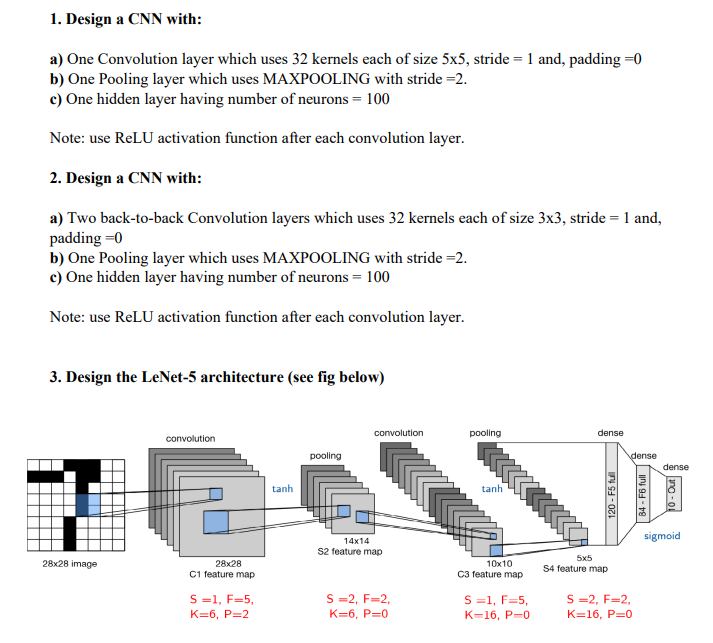

In [26]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255


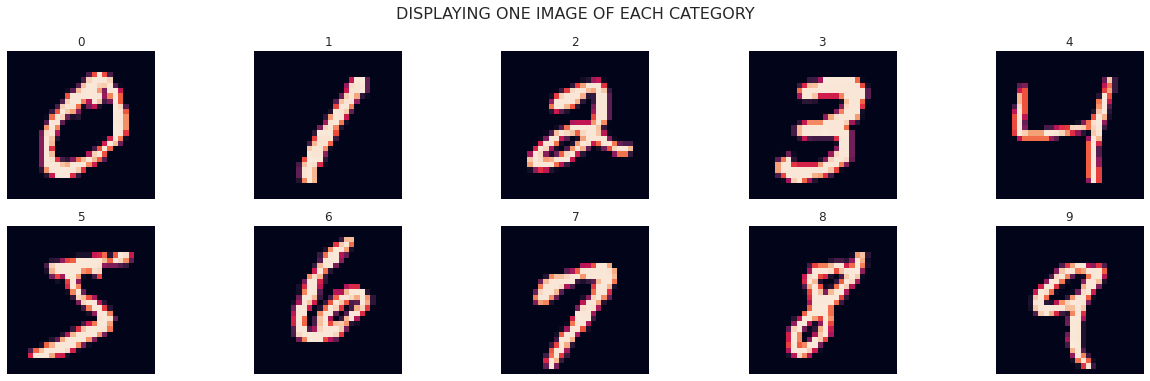

In [27]:
fig, ax= plt.subplots(nrows= 2, ncols= 5, figsize= (18,5))
plt.suptitle('displaying one image of each category'.upper(), y= 1.05, fontsize= 16)

i= 0
for j in range(2):
  for k in range(5):
    ax[j,k].imshow(x_train[list(y_train).index(i)])
    ax[j,k].axis('off')
    ax[j,k].set_title(i)
    i+=1

plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


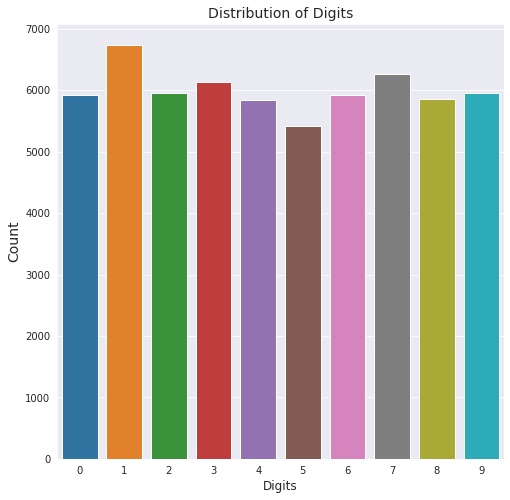

In [28]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(y_train)
ax.set_title('Distribution of Digits', fontsize=14)
ax.set_xlabel('Digits', fontsize=12)
ax.set_ylabel('Count', fontsize=14)
plt.show()

In [29]:
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [30]:
batch_size_m = 128
epochs_m = 30

In [31]:
model1m = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(5, 5), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2),strides=2),
        layers.Flatten(),
        layers.Dense(100, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model1m.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 4608)              0         
                                                                 
 dense_13 (Dense)            (None, 100)               460900    
                                                                 
 dense_14 (Dense)            (None, 10)                1010      
                                                                 
Total params: 462,742
Trainable params: 462,742
Non-trainable params: 0
________________________________________________

In [32]:

callback1 = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model1m.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history1m = model1m.fit(x_train, y_train, batch_size=batch_size_m, epochs=epochs_m, validation_split=0.1,callbacks=[callback1])

Epoch 1/30
422/422 [==============================] - 2s 5ms/step - loss: 0.2287 - accuracy: 0.9334 - val_loss: 0.0789 - val_accuracy: 0.9783
Epoch 2/30
422/422 [==============================] - 2s 4ms/step - loss: 0.0733 - accuracy: 0.9779 - val_loss: 0.0663 - val_accuracy: 0.9810
Epoch 3/30
422/422 [==============================] - 2s 4ms/step - loss: 0.0499 - accuracy: 0.9845 - val_loss: 0.0542 - val_accuracy: 0.9863
Epoch 4/30
422/422 [==============================] - 2s 4ms/step - loss: 0.0361 - accuracy: 0.9889 - val_loss: 0.0501 - val_accuracy: 0.9872
Epoch 5/30
422/422 [==============================] - 2s 4ms/step - loss: 0.0277 - accuracy: 0.9912 - val_loss: 0.0535 - val_accuracy: 0.9850
Epoch 6/30
422/422 [==============================] - 2s 4ms/step - loss: 0.0226 - accuracy: 0.9926 - val_loss: 0.0427 - val_accuracy: 0.9902
Epoch 7/30
422/422 [==============================] - 2s 4ms/step - loss: 0.0167 - accuracy: 0.9947 - val_loss: 0.0433 - val_accuracy: 0.9887
Epoch 

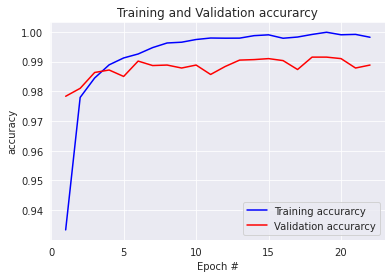

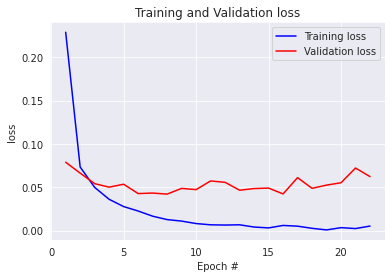

In [33]:
sns.set_style("darkgrid")
acc = history1m.history['accuracy']
val_acc = history1m.history['val_accuracy']
loss = history1m.history['loss']
val_loss = history1m.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()


In [34]:
score1m = model1m.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score1m[0])
print("Test accuracy:", score1m[1])

Test loss: 0.050087761133909225
Test accuracy: 0.9887999892234802


In [35]:
model2m = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2),strides=2),
        layers.Flatten(),
        layers.Dense(100, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model2m.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 4608)              0         
                                                                 
 dense_15 (Dense)            (None, 100)               460900    
                                                                 
 dense_16 (Dense)            (None, 10)                1010      
                                                      

In [36]:
callback2 = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model2m.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history2m = model2m.fit(x_train, y_train, batch_size=batch_size_m, epochs=epochs_m, validation_split=0.1,callbacks=[callback2])

Epoch 1/30
422/422 [==============================] - 3s 7ms/step - loss: 0.2002 - accuracy: 0.9418 - val_loss: 0.0638 - val_accuracy: 0.9817
Epoch 2/30
422/422 [==============================] - 3s 6ms/step - loss: 0.0524 - accuracy: 0.9844 - val_loss: 0.0472 - val_accuracy: 0.9868
Epoch 3/30
422/422 [==============================] - 3s 6ms/step - loss: 0.0351 - accuracy: 0.9891 - val_loss: 0.0455 - val_accuracy: 0.9877
Epoch 4/30
422/422 [==============================] - 3s 6ms/step - loss: 0.0230 - accuracy: 0.9931 - val_loss: 0.0407 - val_accuracy: 0.9890
Epoch 5/30
422/422 [==============================] - 3s 6ms/step - loss: 0.0172 - accuracy: 0.9943 - val_loss: 0.0477 - val_accuracy: 0.9900
Epoch 6/30
422/422 [==============================] - 3s 6ms/step - loss: 0.0128 - accuracy: 0.9956 - val_loss: 0.0483 - val_accuracy: 0.9895
Epoch 7/30
422/422 [==============================] - 3s 6ms/step - loss: 0.0091 - accuracy: 0.9974 - val_loss: 0.0508 - val_accuracy: 0.9900
Epoch 

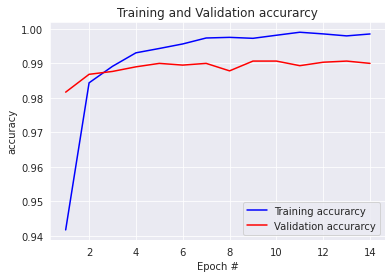

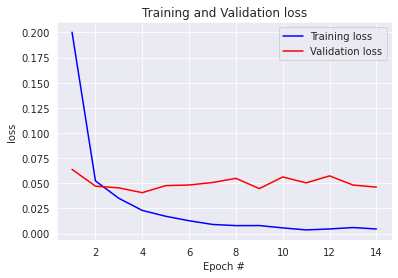

In [37]:
sns.set_style("darkgrid")
acc = history2m.history['accuracy']
val_acc = history2m.history['val_accuracy']
loss = history2m.history['loss']
val_loss = history2m.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()


In [38]:
score2m = model2m.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score2m[0])
print("Test accuracy:", score2m[1])

Test loss: 0.04229636490345001
Test accuracy: 0.9902999997138977


In [39]:
model3m = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(6, kernel_size=(5, 5), activation="tanh", padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2),strides=2),
        layers.Conv2D(16, kernel_size=(5, 5), activation="tanh"),
        layers.MaxPooling2D(pool_size=(2, 2),strides=2),
        layers.Flatten(),
        layers.Dense(120, activation="sigmoid"),
        layers.Dense(84, activation="sigmoid"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model3m.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 400)               0         
                                                                 
 dense_17 (Dense)            (None, 120)              

In [22]:
callback3 = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model3m.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history3m=model3m.fit(x_train, y_train, batch_size=batch_size_m, epochs=epochs_m, validation_split=0.1,callbacks=[callback3])

Epoch 1/30
422/422 [==============================] - 3s 5ms/step - loss: 0.6241 - accuracy: 0.8575 - val_loss: 0.1170 - val_accuracy: 0.9722
Epoch 2/30
422/422 [==============================] - 2s 4ms/step - loss: 0.1039 - accuracy: 0.9727 - val_loss: 0.0675 - val_accuracy: 0.9807
Epoch 3/30
422/422 [==============================] - 2s 4ms/step - loss: 0.0672 - accuracy: 0.9815 - val_loss: 0.0565 - val_accuracy: 0.9835
Epoch 4/30
422/422 [==============================] - 2s 4ms/step - loss: 0.0514 - accuracy: 0.9857 - val_loss: 0.0493 - val_accuracy: 0.9857
Epoch 5/30
422/422 [==============================] - 2s 4ms/step - loss: 0.0419 - accuracy: 0.9881 - val_loss: 0.0464 - val_accuracy: 0.9868
Epoch 6/30
422/422 [==============================] - 2s 4ms/step - loss: 0.0349 - accuracy: 0.9899 - val_loss: 0.0435 - val_accuracy: 0.9882
Epoch 7/30
422/422 [==============================] - 2s 4ms/step - loss: 0.0299 - accuracy: 0.9910 - val_loss: 0.0423 - val_accuracy: 0.9882
Epoch 

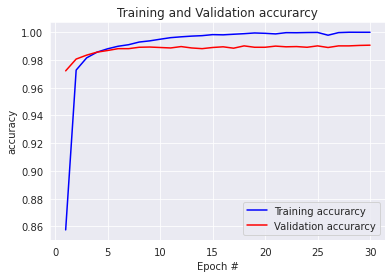

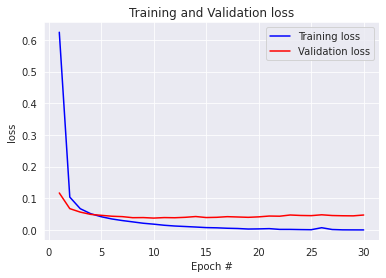

In [23]:
sns.set_style("darkgrid")
acc = history3m.history['accuracy']
val_acc = history3m.history['val_accuracy']
loss = history3m.history['loss']
val_loss = history3m.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()


In [24]:
score3m = model3m.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score3m[0])
print("Test accuracy:", score3m[1])

Test loss: 0.04358062893152237
Test accuracy: 0.989300012588501


In [57]:
# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)
# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255


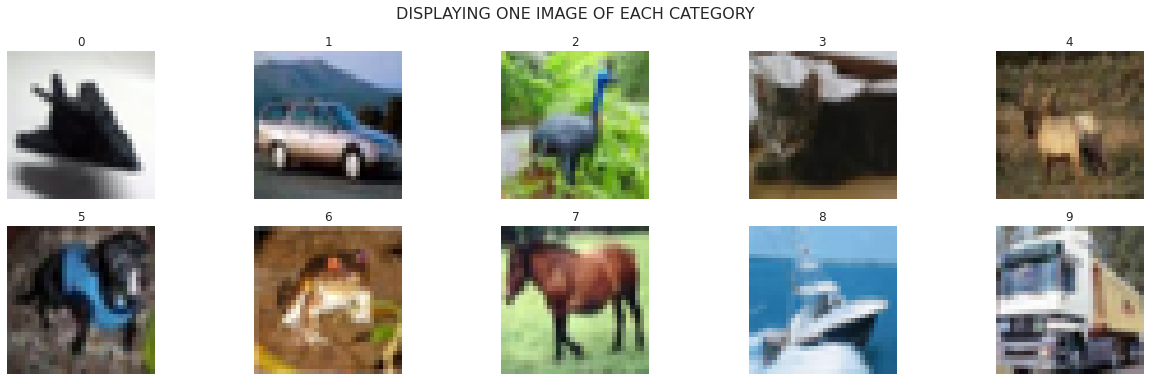

In [58]:
fig, ax= plt.subplots(nrows= 2, ncols= 5, figsize= (18,5))
plt.suptitle('displaying one image of each category'.upper(), y= 1.05, fontsize= 16)

i= 0
for j in range(2):
  for k in range(5):
    ax[j,k].imshow(x_train[list(y_train).index(i)])
    ax[j,k].axis('off')
    ax[j,k].set_title(i)
    i+=1

plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


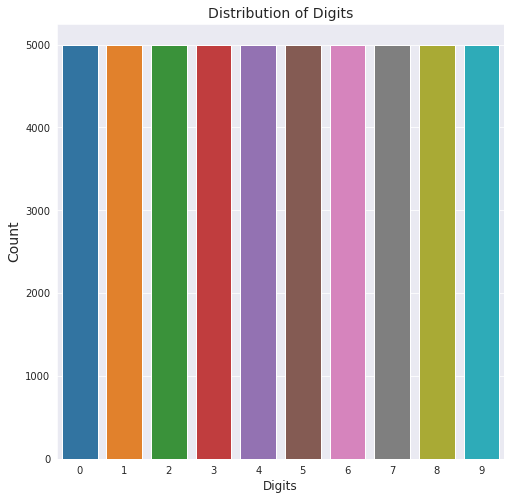

In [65]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(y_train.reshape(-1))
ax.set_title('Distribution of CIFAR Images', fontsize=14)
ax.set_xlabel('Digits', fontsize=12)
ax.set_ylabel('Count', fontsize=14)
plt.show()

In [56]:
# Make sure images have shape (32,32, 1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [43]:
batch_size_c = 128
epochs_c = 50

In [44]:
model1c = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(5, 5), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2),strides=2),
        layers.Flatten(),
        layers.Dense(100, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model1c.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 6272)              0         
                                                                 
 dense_20 (Dense)            (None, 100)               627300    
                                                                 
 dense_21 (Dense)            (None, 10)                1010      
                                                                 
Total params: 630,742
Trainable params: 630,742
Non-trainable params: 0
________________________________________________

In [45]:
callback1 = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model1c.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history1c = model1c.fit(x_train, y_train, batch_size=batch_size_c, epochs=epochs_c, validation_split=0.1,callbacks=[callback1])

Epoch 1/50
352/352 [==============================] - 2s 6ms/step - loss: 1.6163 - accuracy: 0.4230 - val_loss: 1.3977 - val_accuracy: 0.5038
Epoch 2/50
352/352 [==============================] - 2s 5ms/step - loss: 1.2890 - accuracy: 0.5487 - val_loss: 1.2337 - val_accuracy: 0.5690
Epoch 3/50
352/352 [==============================] - 2s 5ms/step - loss: 1.1670 - accuracy: 0.5933 - val_loss: 1.2077 - val_accuracy: 0.5740
Epoch 4/50
352/352 [==============================] - 2s 5ms/step - loss: 1.0886 - accuracy: 0.6206 - val_loss: 1.1064 - val_accuracy: 0.6134
Epoch 5/50
352/352 [==============================] - 2s 5ms/step - loss: 1.0216 - accuracy: 0.6446 - val_loss: 1.1154 - val_accuracy: 0.6134
Epoch 6/50
352/352 [==============================] - 2s 5ms/step - loss: 0.9695 - accuracy: 0.6617 - val_loss: 1.0571 - val_accuracy: 0.6458
Epoch 7/50
352/352 [==============================] - 2s 5ms/step - loss: 0.9307 - accuracy: 0.6756 - val_loss: 1.0172 - val_accuracy: 0.6548
Epoch 

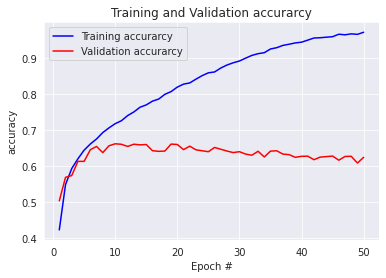

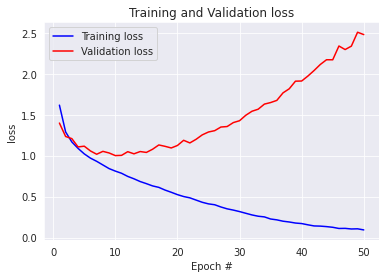

In [46]:
sns.set_style("darkgrid")
acc = history1c.history['accuracy']
val_acc = history1c.history['val_accuracy']
loss = history1c.history['loss']
val_loss = history1c.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()


In [47]:
score1c = model1c.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score1c[0])
print("Test accuracy:", score1c[1])

Test loss: 2.6326045989990234
Test accuracy: 0.6092000007629395


In [48]:
model2c = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2),strides=2),
        layers.Flatten(),
        layers.Dense(100, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model2c.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_16 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 6272)              0         
                                                                 
 dense_22 (Dense)            (None, 100)               627300    
                                                                 
 dense_23 (Dense)            (None, 10)                1010      
                                                      

In [49]:
callback2 = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model2c.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history2c = model2c.fit(x_train, y_train, batch_size=batch_size_c, epochs=epochs_c, validation_split=0.1,callbacks=[callback2])

Epoch 1/50
352/352 [==============================] - 4s 9ms/step - loss: 1.5438 - accuracy: 0.4491 - val_loss: 1.2862 - val_accuracy: 0.5490
Epoch 2/50
352/352 [==============================] - 3s 7ms/step - loss: 1.1962 - accuracy: 0.5824 - val_loss: 1.1160 - val_accuracy: 0.6160
Epoch 3/50
352/352 [==============================] - 3s 8ms/step - loss: 1.0348 - accuracy: 0.6414 - val_loss: 1.0890 - val_accuracy: 0.6238
Epoch 4/50
352/352 [==============================] - 3s 8ms/step - loss: 0.9363 - accuracy: 0.6734 - val_loss: 0.9777 - val_accuracy: 0.6634
Epoch 5/50
352/352 [==============================] - 3s 8ms/step - loss: 0.8488 - accuracy: 0.7068 - val_loss: 0.9444 - val_accuracy: 0.6826
Epoch 6/50
352/352 [==============================] - 3s 8ms/step - loss: 0.7820 - accuracy: 0.7285 - val_loss: 0.9653 - val_accuracy: 0.6662
Epoch 7/50
352/352 [==============================] - 3s 8ms/step - loss: 0.7171 - accuracy: 0.7518 - val_loss: 0.9566 - val_accuracy: 0.6776
Epoch 

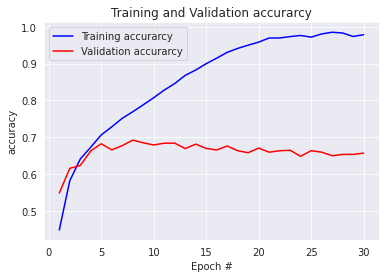

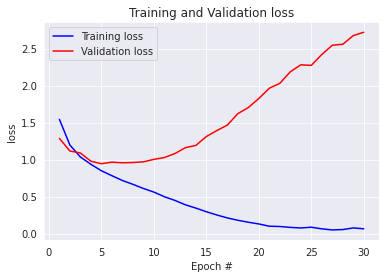

In [50]:
sns.set_style("darkgrid")
acc = history2c.history['accuracy']
val_acc = history2c.history['val_accuracy']
loss = history2c.history['loss']
val_loss = history2c.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()


In [51]:
score2c = model2c.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score2c[0])
print("Test accuracy:", score2c[1])

Test loss: 2.8271539211273193
Test accuracy: 0.6452999711036682


In [52]:
model3c = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(6, kernel_size=(5, 5), activation="tanh",padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(16, kernel_size=(5, 5), activation="tanh"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(120, activation="sigmoid"),
        layers.Dense(84, activation="sigmoid"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model3c.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 32, 32, 6)         456       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 16, 16, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 12, 12, 16)        2416      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 6, 6, 16)         0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 576)               0         
                                                                 
 dense_24 (Dense)            (None, 120)             

In [53]:
callback3 = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model3c.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history3c=model3c.fit(x_train, y_train, batch_size=batch_size_c, epochs=epochs_c, validation_split=0.1,callbacks=[callback3])

Epoch 1/50
352/352 [==============================] - 3s 6ms/step - loss: 1.8973 - accuracy: 0.3144 - val_loss: 1.6428 - val_accuracy: 0.4146
Epoch 2/50
352/352 [==============================] - 2s 5ms/step - loss: 1.5242 - accuracy: 0.4498 - val_loss: 1.4327 - val_accuracy: 0.4846
Epoch 3/50
352/352 [==============================] - 2s 5ms/step - loss: 1.3893 - accuracy: 0.5001 - val_loss: 1.3494 - val_accuracy: 0.5246
Epoch 4/50
352/352 [==============================] - 2s 5ms/step - loss: 1.3045 - accuracy: 0.5315 - val_loss: 1.2658 - val_accuracy: 0.5464
Epoch 5/50
352/352 [==============================] - 2s 5ms/step - loss: 1.2368 - accuracy: 0.5599 - val_loss: 1.2065 - val_accuracy: 0.5698
Epoch 6/50
352/352 [==============================] - 2s 5ms/step - loss: 1.1721 - accuracy: 0.5822 - val_loss: 1.1653 - val_accuracy: 0.5854
Epoch 7/50
352/352 [==============================] - 2s 5ms/step - loss: 1.1163 - accuracy: 0.6052 - val_loss: 1.1433 - val_accuracy: 0.5914
Epoch 

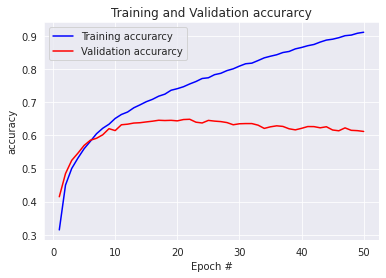

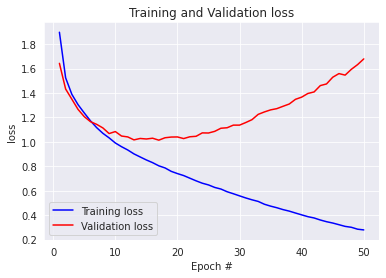

In [54]:
sns.set_style("darkgrid")
acc = history3c.history['accuracy']
val_acc = history3c.history['val_accuracy']
loss = history3c.history['loss']
val_loss = history3c.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()


In [55]:
score3c = model3c.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score3c[0])
print("Test accuracy:", score3c[1])

Test loss: 1.759361743927002
Test accuracy: 0.5997999906539917


# Q4. Compare the performances of the above three architectures with respect to the two datasets.

## Hyperparameters Information -
For both Datasets we used,

- Batch Size - 128

- Optimizer - Adam 

- Loss - categorical_crossentropy

- Metric - Accuracy

- Learning Rate - 0.001

For CIFAR10

- Epochs -50

For MNIST

- Epochs -30


## Observation for Training, Validation and Testing phase of all 3- models for both Dataset.

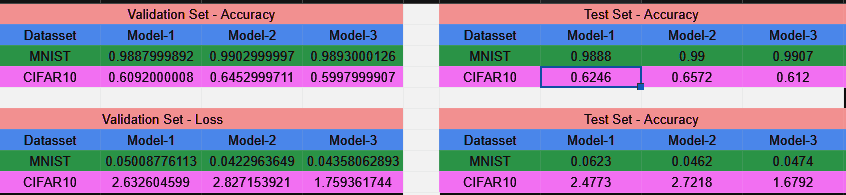


For MNIST-

We observe all three models converge and are generalizable for both validation and test set with Model-3 giving the best performance on test-set.
However, better overall performance provided by Model-2. We observe all three models overfit on training set leading to around 0.5-2% performance difference on validation and test set.


For CIFAR10 -

We observe all three models provide sub-par performance with Model-2 providing best overall performance on both validation and test set. All the models show common pattern of not being able to generalize performance of training set  and perform well on validation set after 7-8 epochs.

